In [33]:
# imports and setup 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import os
import time

reward_offsets= {}
reward_offsets['cheesemaze']=10
reward_offsets['tictactoe']=3
reward_offsets['tiger']=100
reward_offsets['rockpaper']=1
reward_offsets['pacman']=0

optimal_play = {}
optimal_play['cheesemaze']= 2
optimal_play['tictactoe']= 1.5
optimal_play['tiger']= 5
optimal_play['rockpaper']=1
optimal_play['pacman']=0

In [30]:
def plotEvaluationPhaseOnly(data,offset):
    df = np.array(data[['cycle','reward','explore_on']])

    dat = []
    ave = [0]

    jdx = 0
    for idx in xrange(1,len(df)):
        if df[idx,2]==1:
            continue

        if df[idx,2] == -1 and df[idx-1,2] == 1:
            continue
        df[idx,1]-=reward_offset
        dat.append(df[idx,1])
        jdx += 1

        ave.append(ave[jdx-1]*float(jdx-1)/jdx + (1.0/jdx) * df[idx,1])
    dat = np.array(dat)
    ave = np.array(ave)
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(211)
    ax.set_title('Average reward per cycle')
    ax.set_xlabel('cycles')
    ax.set_ylabel('average reward per cycle')
    ax.scatter(np.arange(len(dat)),dat)
    ax.scatter(np.arange(len(ave)),ave,color='red')
    
def plotRunningAndRollingAverage(data,offset,title):
    dat=np.array(data[['reward']])

    # compute running average
    dat-=reward_offset
    cs = np.cumsum(dat).astype(float)
    for i in xrange(1,len(dat)):
        cs[i]/=i

    # compute rolling average reward/cycle
    dicks = []
    window_size = 500
    tmp = np.sum(dat[0:window_size])/window_size
    for i in xrange(window_size,len(dat)):
        tmp += float(dat[i])/window_size
        tmp -= float(dat[i-window_size])/window_size
        dicks.append(tmp)
    dicks = np.array(dicks)

    # plots
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(211)
    ax.set_title(title)
    ax.scatter(np.arange(len(dat)),cs)
    ax.scatter(np.arange(len(dat)-window_size),dicks,color='blue')

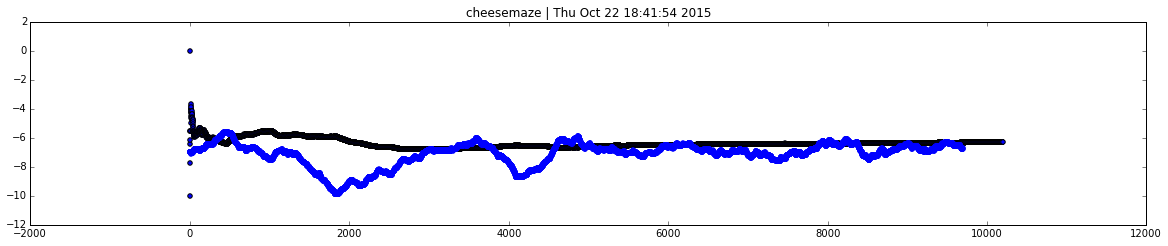

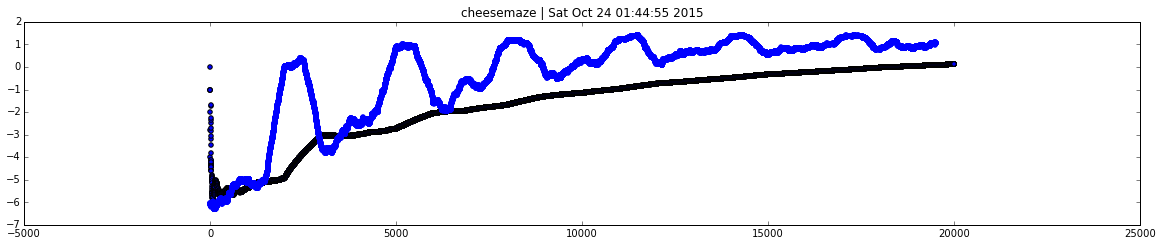

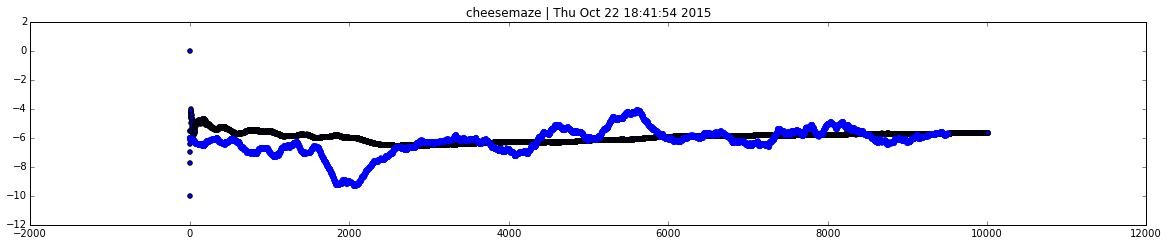

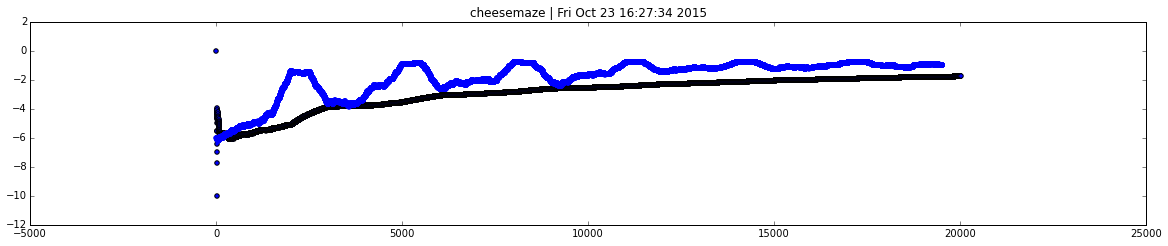

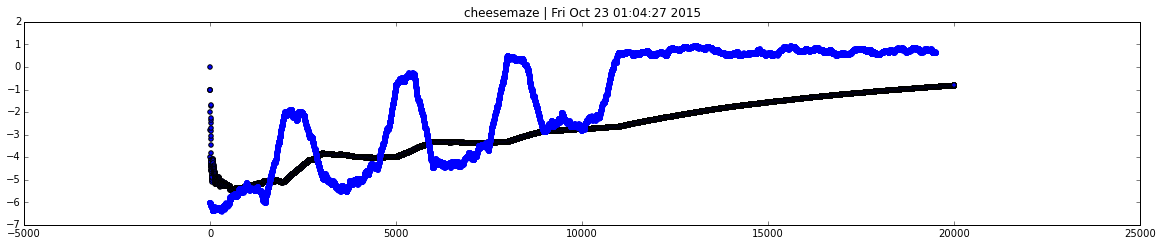

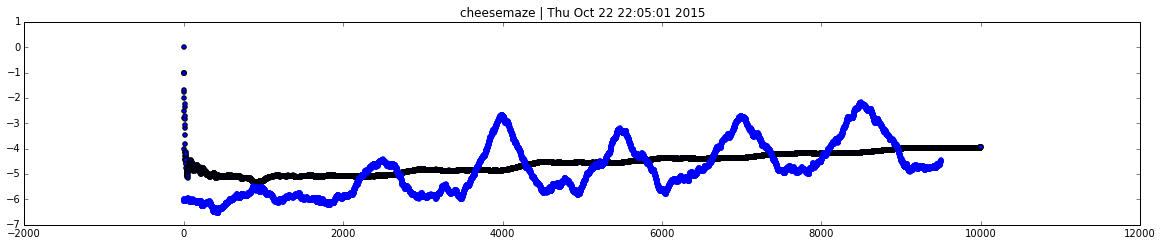

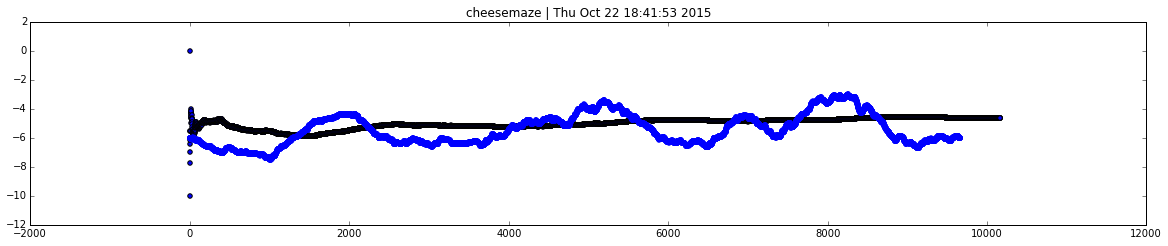

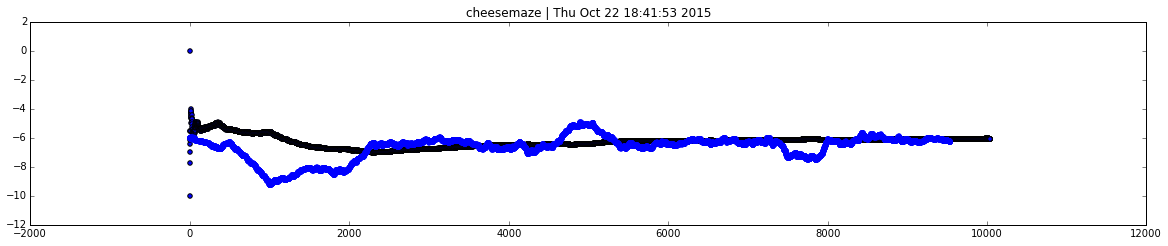

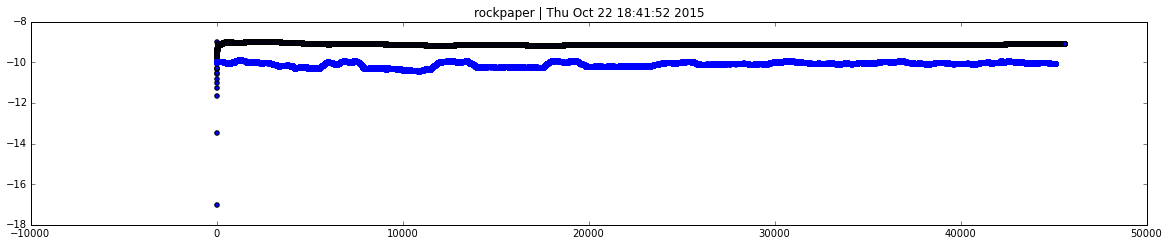

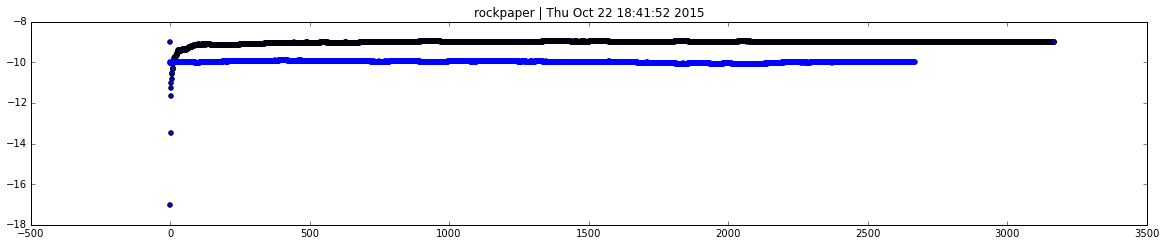

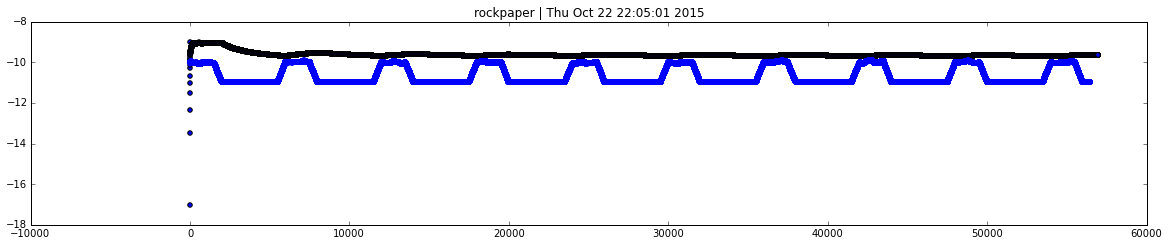

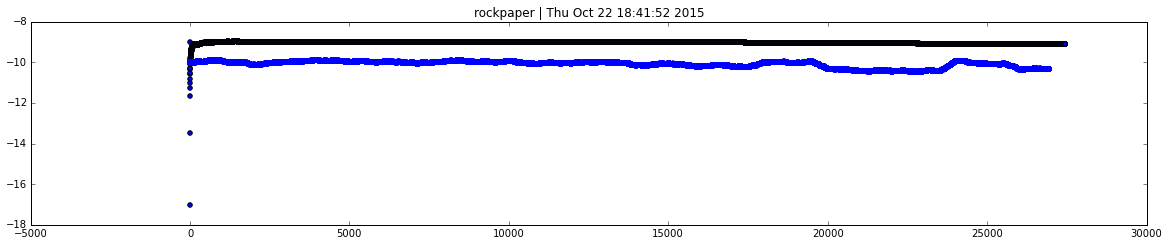

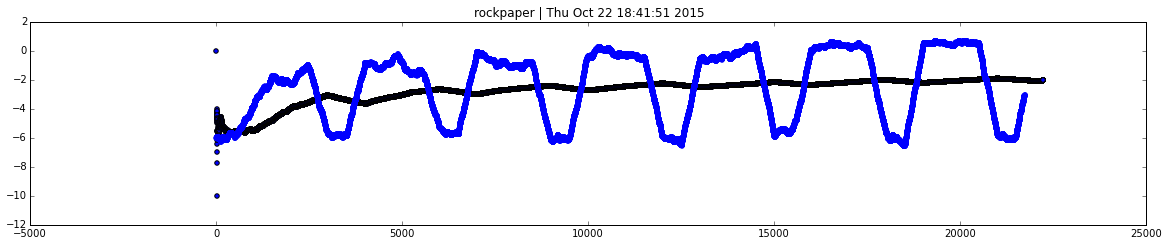

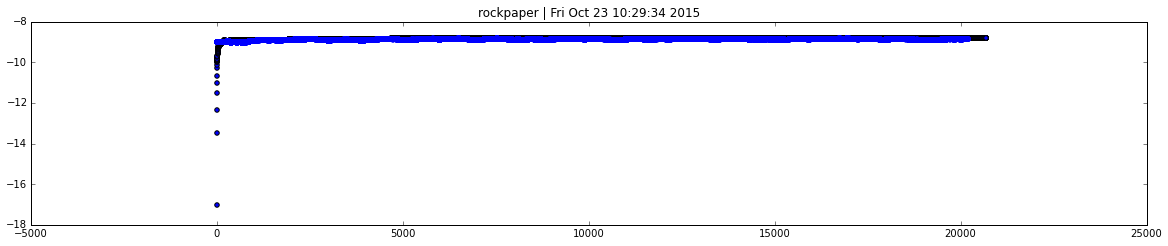

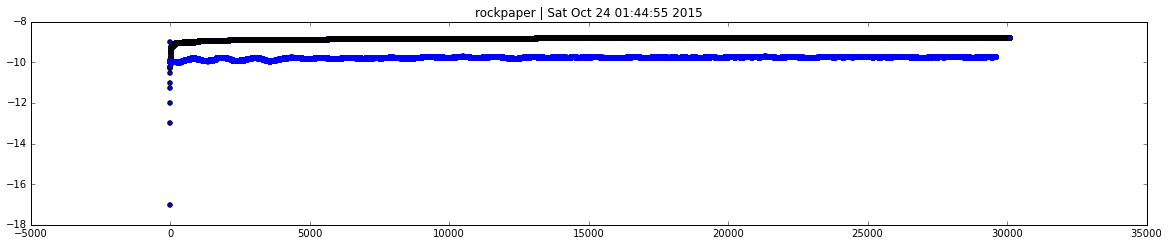

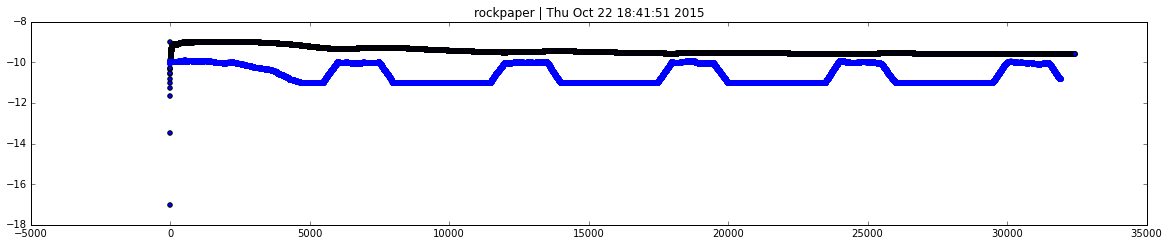

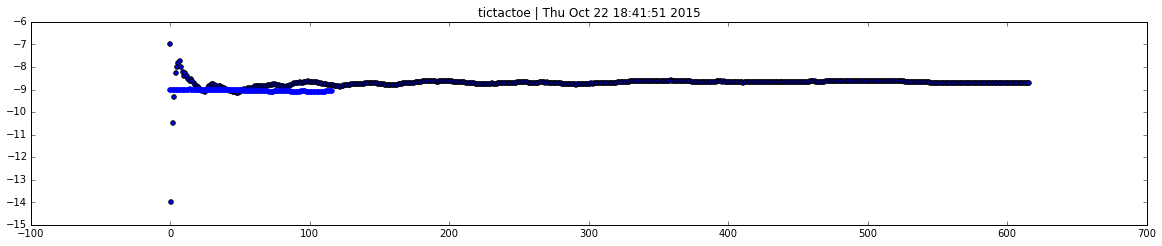

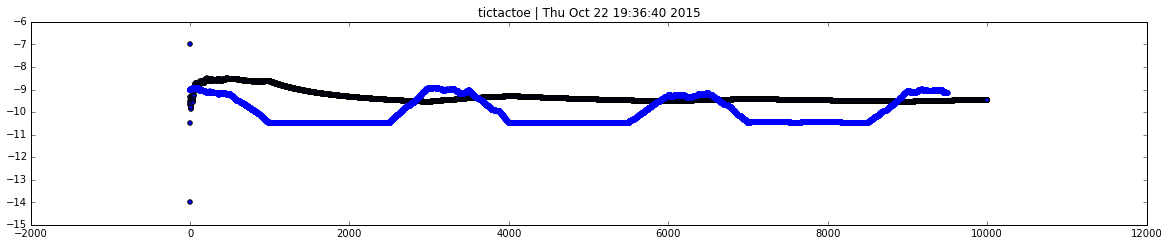

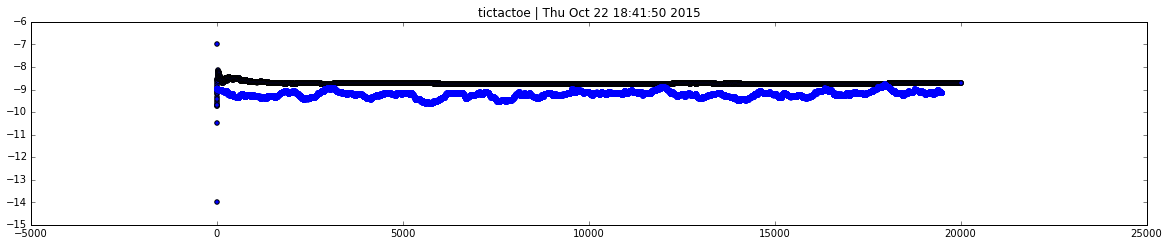

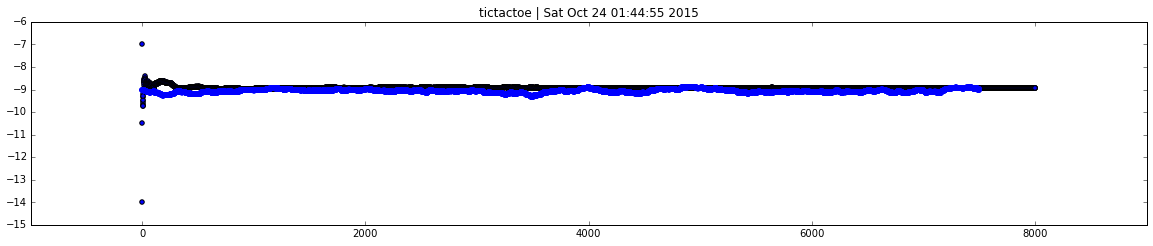

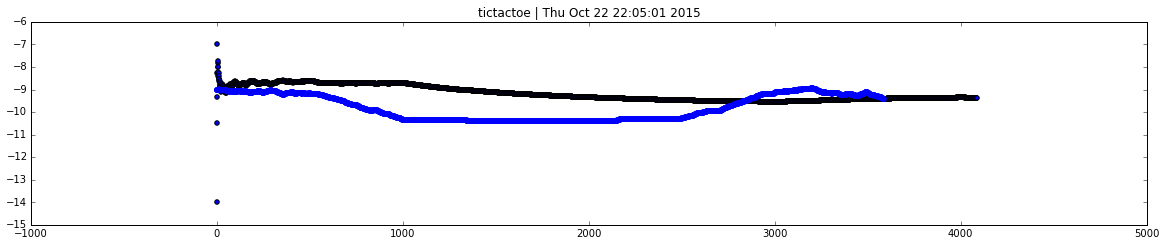

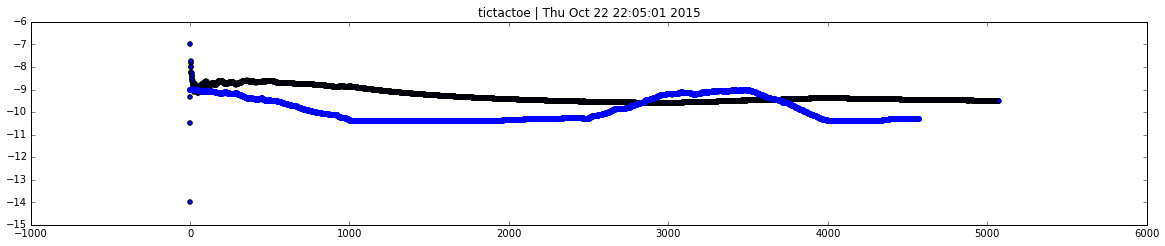

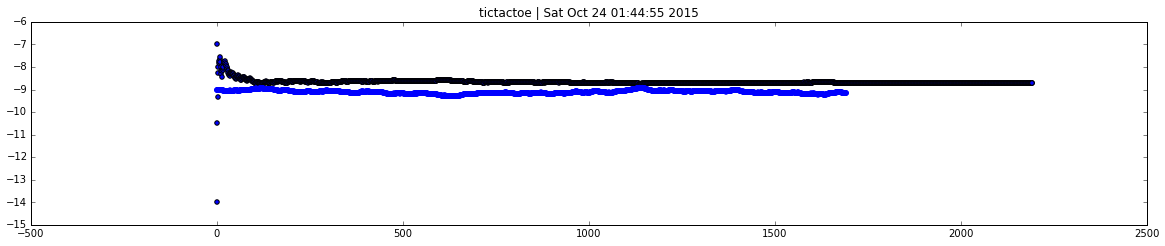

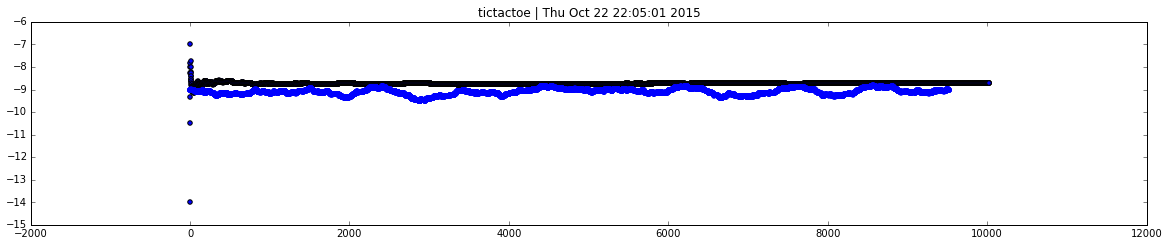

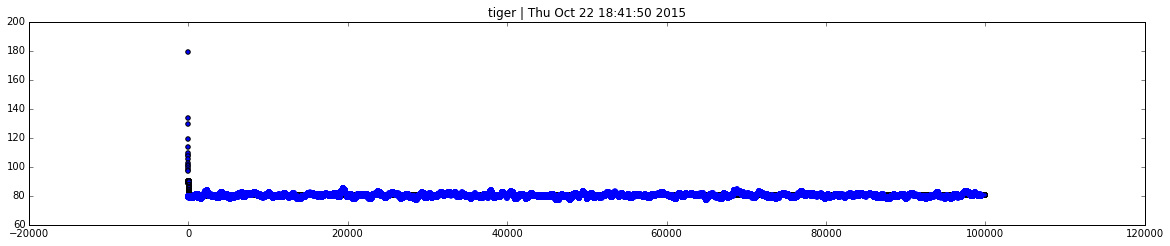

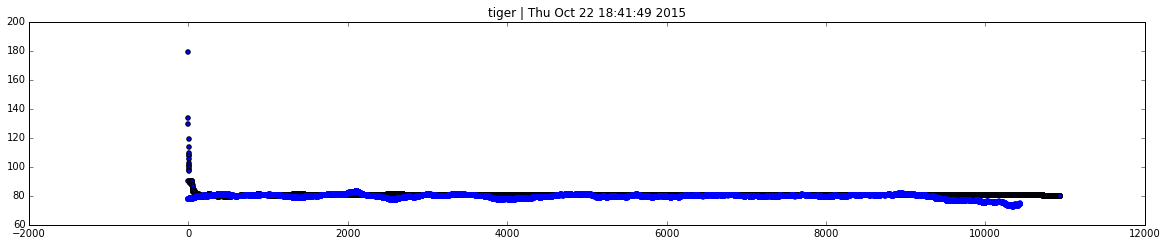

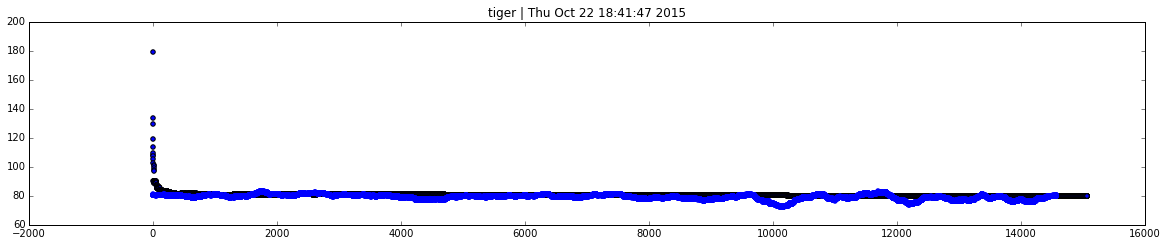

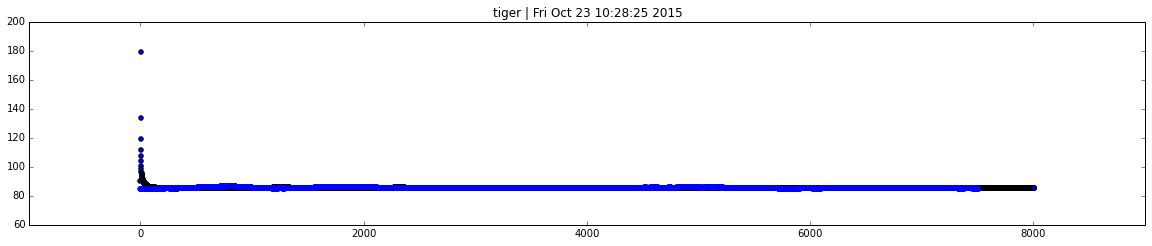

In [37]:
dir = '../logs/'
for file in os.listdir(dir):
    if file.endswith(".csv"):
        data = pd.read_csv(dir+file,sep=', ',engine='python')
        game = file.split('-')[0]
        title = game + ' | ' + time.ctime(os.path.getctime(dir+file))
        plotRunningAndRollingAverage(data,reward_offsets[game],title)